### Machine Learning Assignment

***
Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). 

Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).

Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.
***

#### Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#### Import arrythmia data

Chose these variables to see if age and weight influence QRSTA values

In [18]:
#load and inspect arrythmia data
a_data = pd.read_csv('arrhythmia.data', header = None, usecols = [0,3,168]) #using age, weight, and qrsta measurement
a_data.head()

,0,3,168
0,75,80,30.8
1,56,64,26.5
2,54,95,19.8
3,55,94,45.1
4,75,80,31.6


#### Clean data

In [19]:
#drop any ?'s and NAs
a_data.replace('?', np.nan, inplace=True)
a_data = a_data.dropna()
print(len(a_data)) #length of dataset did not change 

452


In [20]:
#rename columns
a_data = a_data.rename(columns = {0:'Age', 3:'Weight', 168:'QRSTA'}) 
a_data.head()

,Age,Weight,QRSTA
0,75,80,30.8
1,56,64,26.5
2,54,95,19.8
3,55,94,45.1
4,75,80,31.6


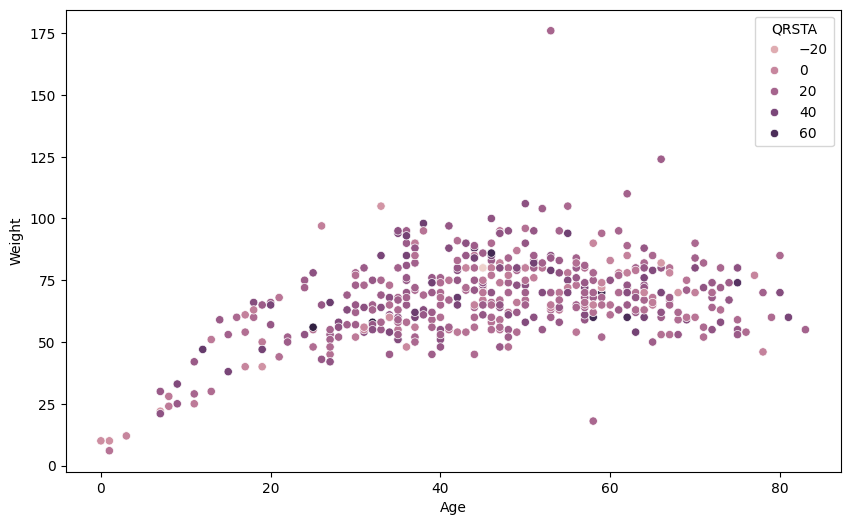

In [21]:
#visualizing the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age', y = 'Weight', hue = 'QRSTA')
plt.show()

In [22]:
print(a_data[['Age', 'Weight', 'QRSTA']].dtypes) #double-checking data types before scaling

Age         int64
Weight      int64
QRSTA     float64
dtype: object


#### Scale data for analysis

In [23]:
scaler = StandardScaler() 

In [24]:
#use scaler to normalize data so that mean is 0 and std is 1
a_data[['Age_T', 'Weight_T', 'QRSTA_T']] = scaler.fit_transform(a_data[['Age', 'Weight', 'QRSTA']])

In [25]:
#view scaled data
a_data

,Age,Weight,QRSTA,Age_T,Weight_T,QRSTA_T
0,75,80,30.8,1.734439,0.713814,0.748209
1,56,64,26.5,0.579312,-0.251644,0.425887
2,54,95,19.8,0.457720,1.618932,-0.076335
3,55,94,45.1,0.518516,1.558590,1.820115
4,75,80,31.6,1.734439,0.713814,0.808175
...,...,...,...,...,...,...
447,53,70,20.6,0.396924,0.110403,-0.016368
448,37,85,11.8,-0.575815,1.015520,-0.676003
449,36,68,20.8,-0.636611,-0.010279,-0.001376
450,32,55,33.4,-0.879796,-0.794714,0.943101


In [26]:
#optimizie number of clusters using function:

def optimize_k_clusters(data, max_k):
    means = []
    inertias = []

    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    #create elbow plot
    fig = plt.subplots(figsize=(10,6))
    plt.plot(means, inertias)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors')
    plt.grid(True)
    plt.show

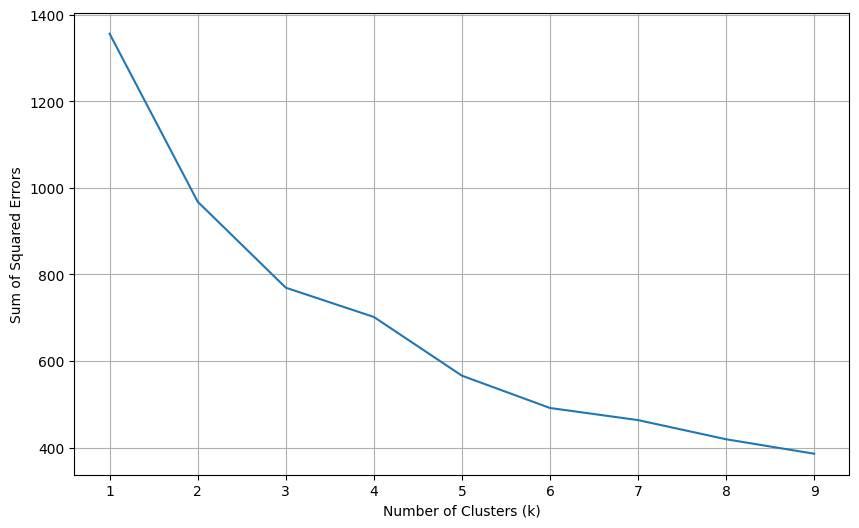

In [27]:
#determining optimal k means clusters using elbow graph
optimize_k_clusters(a_data[['Age_T','Weight_T','QRSTA_T']],10)

Based on this graph and where the 'elbow' occurs, I would determine that 6 is the optimal number
   of clusters to use for this subset of the data. However, based on the large inertia value, I would also
   say that these three variables are not necessarily closely correlated with one another

In [28]:
#assign k means clusters value
kmeans = KMeans(n_clusters=6)

In [29]:
kmeans.fit(a_data[['Age_T', 'Weight_T','QRSTA_T']])

KMeans(n_clusters=6)

In [30]:
#create new column for each assigned cluster
a_data['Cluster']=kmeans.labels_
a_data

,Age,Weight,QRSTA,Age_T,Weight_T,QRSTA_T,Cluster
0,75,80,30.8,1.734439,0.713814,0.748209,1
1,56,64,26.5,0.579312,-0.251644,0.425887,1
2,54,95,19.8,0.457720,1.618932,-0.076335,4
3,55,94,45.1,0.518516,1.558590,1.820115,4
4,75,80,31.6,1.734439,0.713814,0.808175,1
...,...,...,...,...,...,...,...
447,53,70,20.6,0.396924,0.110403,-0.016368,2
448,37,85,11.8,-0.575815,1.015520,-0.676003,4
449,36,68,20.8,-0.636611,-0.010279,-0.001376,0
450,32,55,33.4,-0.879796,-0.794714,0.943101,5


#### Plotting scaled data

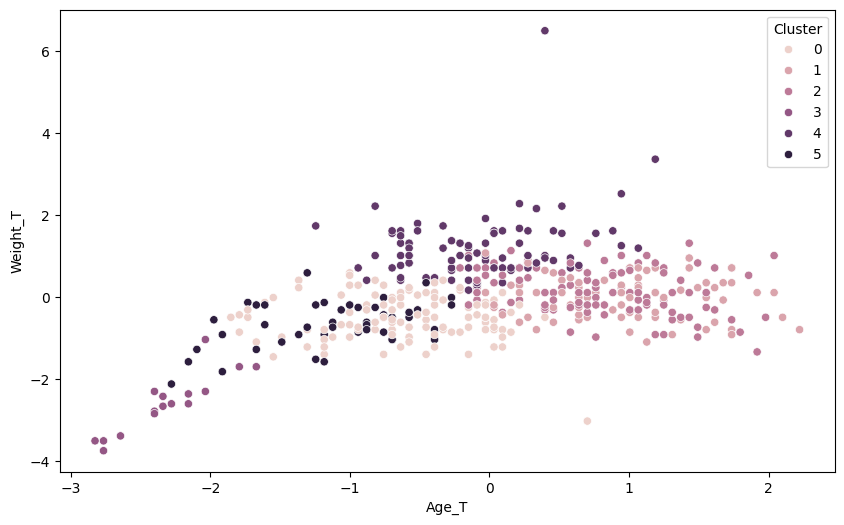

In [31]:
#plot new cluster results
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age_T', y = 'Weight_T', hue = 'Cluster')
plt.show()

This graph is produced based off of the results from the elbow graph. Unlike other datasets, which have fairly clear grouping of clusters to begin with,
    this one was much less obvious without the use of the elbow graph. I would be curious to see how
    this whole dataset could be used to characterize patients into the 16 classifications that are mentioned on the UC Irvine
    site. However, it seemed that many examples indicated that datasets that have many dimensions like the arrhythmia dataset
    are much more difficult to work with.


<Axes: ylabel='QRSTA'>

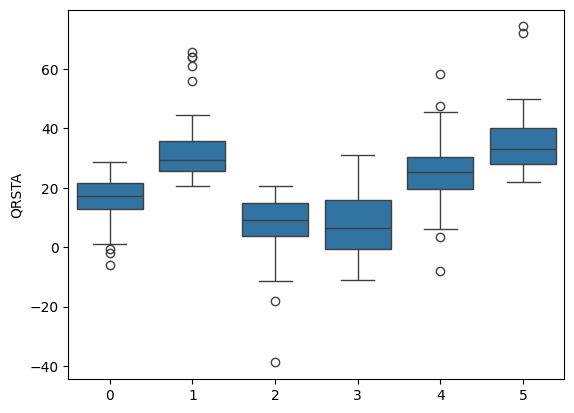

In [32]:
sns.boxplot(x = kmeans.labels_, y = a_data['QRSTA'])

While there is overlap amongst the different box plots, there is separation between their medians

In [33]:
#trying with 3 clusters (based on elbow graph, this looked like the second best choice)
kmeans3 = KMeans(n_clusters=3)

In [34]:
#fit using 3 clusters
kmeans3.fit(a_data[['Age_T', 'Weight_T','QRSTA_T']])

KMeans(n_clusters=3)

In [35]:
#create new column for each assigned cluster
a_data['Cluster3']=kmeans3.labels_
a_data

,Age,Weight,QRSTA,Age_T,Weight_T,QRSTA_T,Cluster,Cluster3
0,75,80,30.8,1.734439,0.713814,0.748209,1,1
1,56,64,26.5,0.579312,-0.251644,0.425887,1,1
2,54,95,19.8,0.457720,1.618932,-0.076335,4,1
3,55,94,45.1,0.518516,1.558590,1.820115,4,1
4,75,80,31.6,1.734439,0.713814,0.808175,1,1
...,...,...,...,...,...,...,...,...
447,53,70,20.6,0.396924,0.110403,-0.016368,2,2
448,37,85,11.8,-0.575815,1.015520,-0.676003,4,2
449,36,68,20.8,-0.636611,-0.010279,-0.001376,0,0
450,32,55,33.4,-0.879796,-0.794714,0.943101,5,0


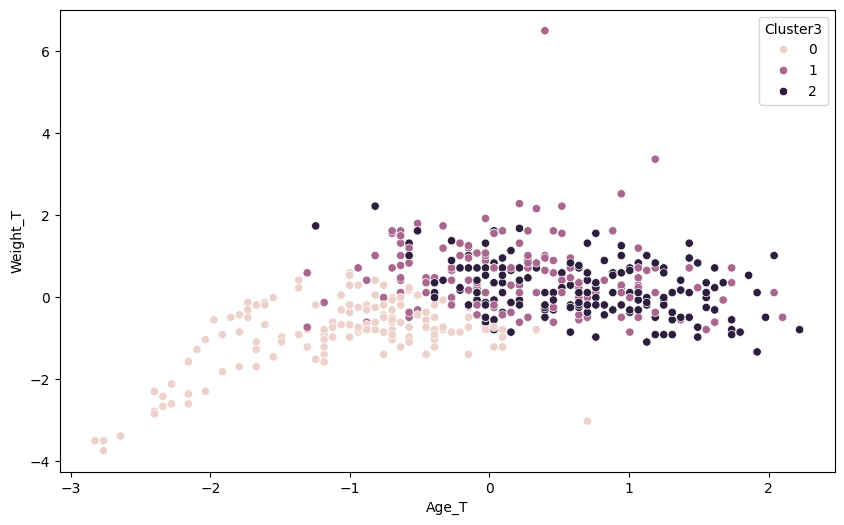

In [36]:
#plot new cluster results based on k=3
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age_T', y = 'Weight_T', hue = 'Cluster3')
plt.show()

<Axes: ylabel='QRSTA'>

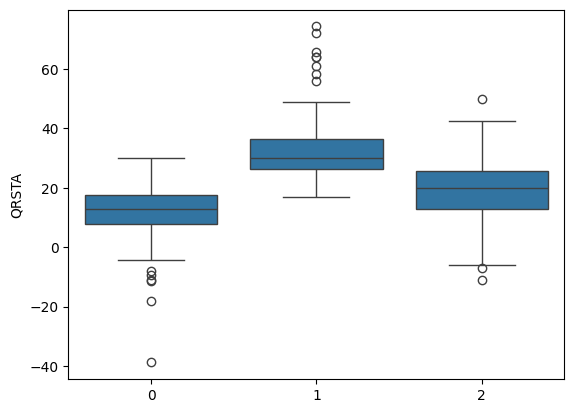

In [182]:
#new box plot with data from 3 clusters version
sns.boxplot(x = kmeans3.labels_, y = a_data['QRSTA'])

Based on these results and the fact that there is less overlap between the boxplots, I would have concluded that 
   perhaps using k = 3 is best. However, decided to further test this based on silhouette scoring.

In [187]:
#testing via a silhouette score
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(a_data)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(a_data, model.labels_, metric='euclidean'))

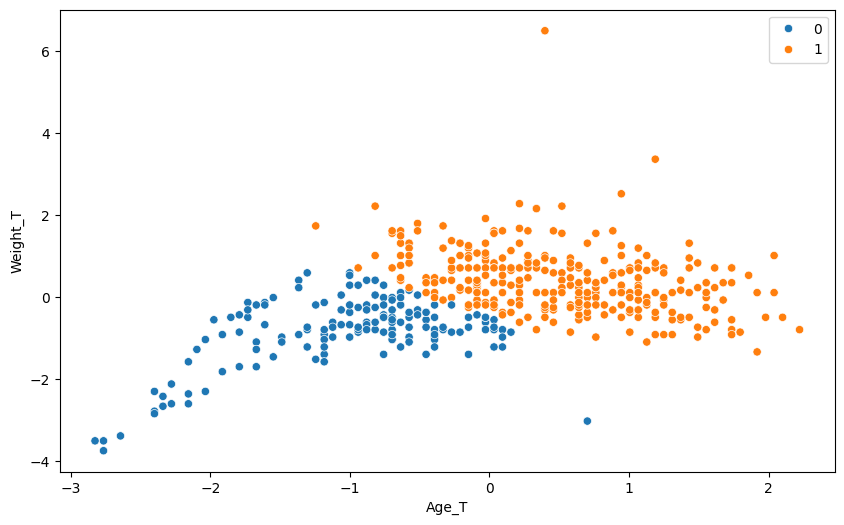

In [188]:
#2 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age_T', y = 'Weight_T', hue = fits[0].labels_)
plt.show()

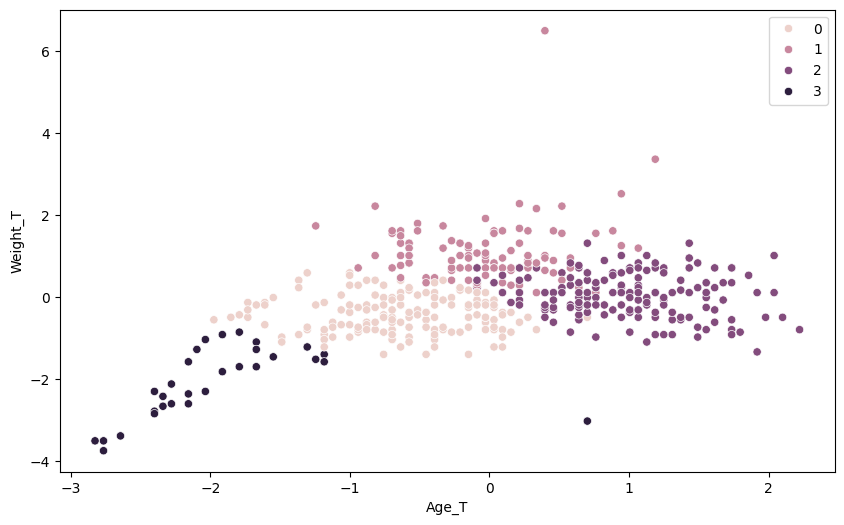

In [189]:
#4 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age_T', y = 'Weight_T', hue = fits[2].labels_)
plt.show()

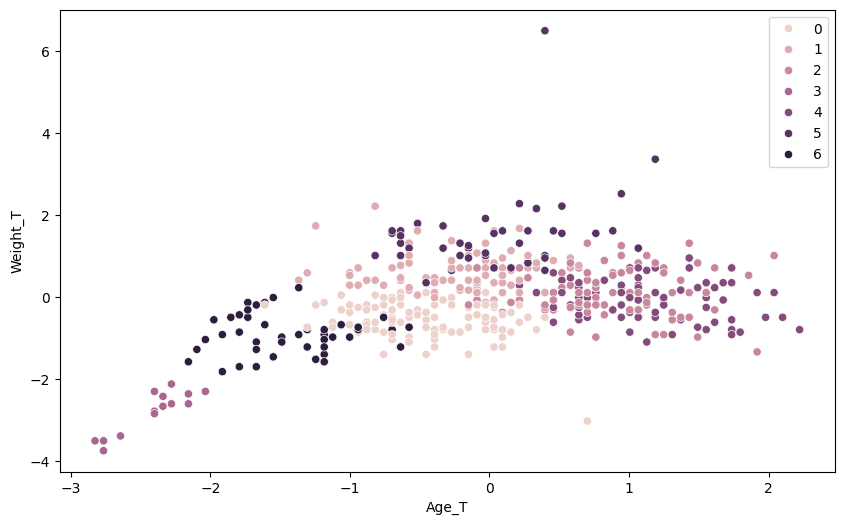

In [197]:
#with 7 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age_T', y = 'Weight_T', hue = fits[5].labels_)
plt.show()

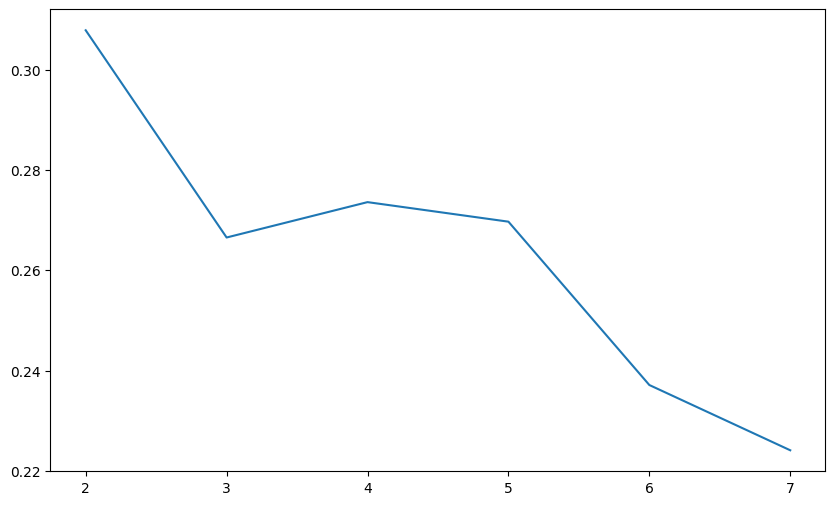

In [192]:
#using lineplot to analyze the silhouette scoring
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

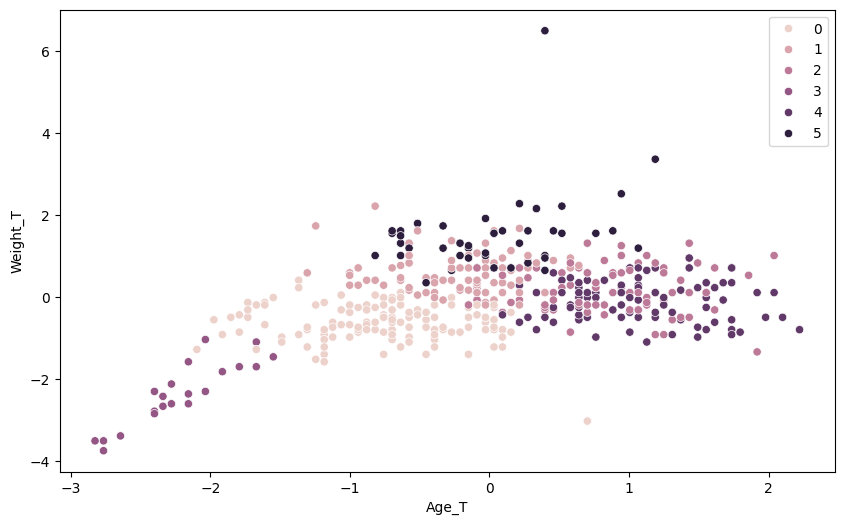

In [198]:
#with 6 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = a_data, x = 'Age_T', y = 'Weight_T', hue = fits[4].labels_)
plt.show()

Based on the original elbow graph and silhouette scoring, I would say that 6 clusters is optimal for this dataset